## Multi-label prediction with SF Crime dataset

In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
from fastai.vision import *

In [23]:
import os

## Multiclassification

In [4]:
df = pd.read_csv('Images/train.csv')
df.head()

,image_name,tags
0,6111000,low_crime
1,6260000,low_crime
2,9173201,low_crime
3,267001,low_crime
4,9165000,low_crime


In [5]:
np.random.seed(42)
src = (ImageList.from_csv(path = "Images", csv_name = 'train.csv', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))
        

In [6]:
tfms = get_transforms(max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [7]:
data = (src.transform(tfms, size=400)
        .databunch().normalize(imagenet_stats))

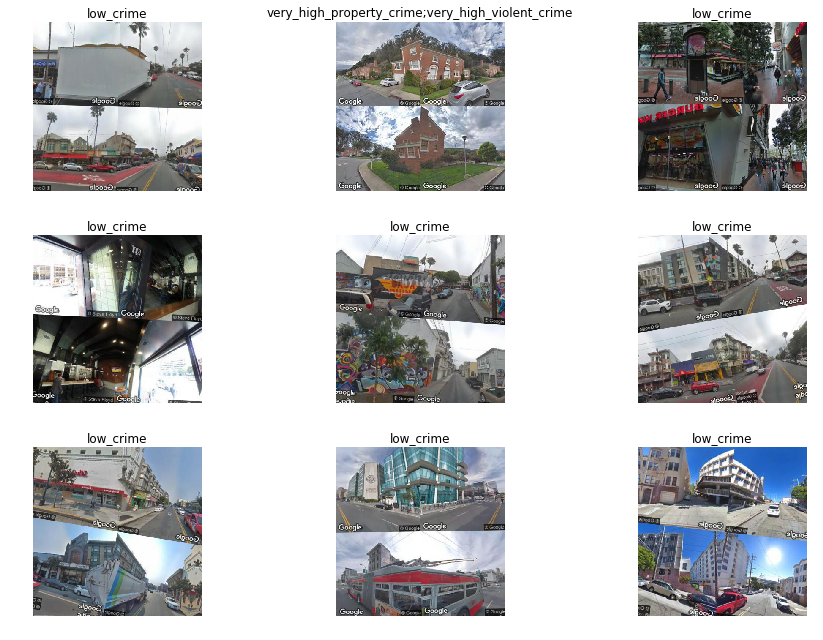

In [8]:
data.show_batch(rows = 3, figsize=(12,9))

In [8]:
from fastai.metrics import error_rate

In [9]:
gc.collect()

arch = models.resnet34
acc_02 = partial(accuracy_thresh, thresh=0.2)
learn = create_cnn(data, arch, metrics=acc_02)

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


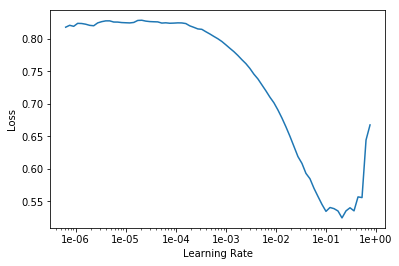

In [11]:
learn.recorder.plot()

Then we can fit the head of our network.

In [14]:
lr = 1e-2

In [15]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,time
1,0.464102,0.309780,0.443769,00:15
2,0.327653,0.105746,0.965552,00:14
3,0.223925,0.088844,0.963526,00:14
4,0.167423,0.088740,0.965552,00:14
5,0.132976,0.089534,0.965552,00:14


In [16]:
learn.save('stage-1-rn34')

...And fine-tune the whole model:

In [20]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


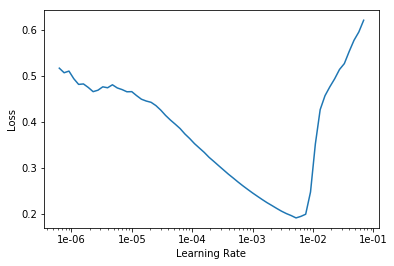

In [21]:
learn.lr_find()
learn.recorder.plot()

In [159]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

NameError: name 'lr' is not defined

In [ ]:
learn.save('stage-2-rn50')

In [ ]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [ ]:
learn.freeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


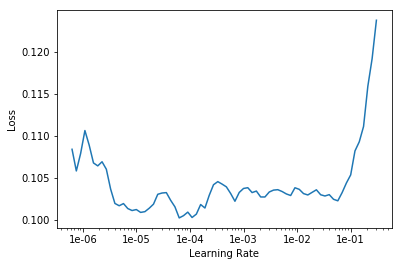

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [22]:
lr=1e-5/2

In [23]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
1,0.596632,1.629862,0.566667,00:04
2,0.564196,1.504490,0.566667,00:04
3,0.529546,1.373977,0.566667,00:04
4,0.501469,1.284932,0.500000,00:04
5,0.469018,1.195185,0.500000,00:04


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

False

In [29]:
interp.most_confused(min_val=2)

[('Property_Crime', 'Violent_Crime', 9), ('Low_Crime', 'Violent_Crime', 5)]